In [102]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

In [103]:
#import API key
from config import api_key

In [104]:
output_data_file = "output_data/cities.csv"


In [105]:
#import citipy to get lists of cities
#set lat and long range when finding the lists of cities
lat_range = (-90, 90)
lng_range = (-180, 180)

from citipy import citipy

In [106]:
#setting each response we get back from api to a list 
lat_lngs = []
temp_responses = []
cities = []
hum_responses = []
cloud_responses = []
wind_speed_res = []
city_id_responses = []
country_responses = []
lat_lng_responses = []

#Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

 #Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
#If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#len(cities)
cities


['flin flon',
 'severo-kurilsk',
 'codrington',
 'bredasdorp',
 'sorvag',
 'kindersley',
 'kavieng',
 'brae',
 'hithadhoo',
 'ponta delgada',
 'kaitangata',
 'neiafu',
 'busselton',
 'kudahuvadhoo',
 'port macquarie',
 'jamestown',
 'nantucket',
 'sao joao da barra',
 'castlebar',
 'katobu',
 'port lincoln',
 'padampur',
 'amderma',
 'cayenne',
 'norman wells',
 'upernavik',
 'ushuaia',
 'tasiilaq',
 'thunder bay',
 'provideniya',
 'cap malheureux',
 'west wendover',
 'tautira',
 'avarua',
 'punta arenas',
 'ozernovskiy',
 'aksu',
 'ajaccio',
 'cabedelo',
 'dikson',
 'barentsburg',
 'hobart',
 'vestmannaeyjar',
 'alofi',
 'carnarvon',
 'saint-philippe',
 'cabra',
 'illoqqortoormiut',
 'feldbach',
 'bo',
 'tual',
 'jabiru',
 'longyearbyen',
 'dukat',
 'taolanaro',
 'jalu',
 'vaini',
 'albany',
 'karaton',
 'ust-kamchatsk',
 'saldanha',
 'castro',
 'inhambane',
 'mataura',
 'puerto ayora',
 'louisbourg',
 'arraial do cabo',
 'obihiro',
 'penzance',
 'butaritari',
 'rikitea',
 'namatanai'

In [107]:
#create a data frame from the cities list

cities_df = pd.DataFrame({
    "Temp_max": [],
    "Humidity": [],
    " Cloudiness ": [], 
    "wind_speed": [],
    "city_id": [],
    "country_code": [],
    "long": [],
    "lat": []
})
    
cities_df.head()
#add cities list as a column 
cities_df['City_name'] = cities
    
#check how many cities we have in the list    
cities_df.head()
#len(cities_df.City_name)


,Temp_max,Humidity,Cloudiness,wind_speed,city_id,country_code,long,lat,City_name
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flin flon
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,severo-kurilsk
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,codrington
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bredasdorp
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sorvag


In [108]:
#partial url 
units = 'Imperial'
url = "http://api.openweathermap.org/data/2.5/weather?"
#query_url = f"{url}appid={api_key}&q={cities}&units={units}"
query_url = f"{url}appid={api_key}&units={units}&q="



In [93]:
# this is a test to confirm we are receiving correct data from the api--these test cities are not the same as those used in the mass
#api pull-scale 10 cities- if we run again-would pull from mass list of 500+ cities

#for loop through city list and retreive temp data for the lat
for city in cities:
    weather_data = requests.get(query_url + city).json()
    temp_responses.append(weather_data)
    
    try:
        print(f"The temp of {city} is {weather_data['main']['temp']}")
    except (KeyError):
        print("Oops, something is missing.Skipping")
    print("------------")
    #print(f"The temp of {city} is {weather_data['main']['temp_max']}")
    
    


#weather_response = requests.get(query_url)
#weather_json = weather_response.json()


#units = "metric"
#url = "http://api.openweathermap.org/data/2.5/weather?"
#query_url = f"{url}appid={api_key}&units={units}&q="

The temp of albany is 79.39
------------
The temp of tazovskiy is 22.72
------------
The temp of tuatapere is 54
------------
The temp of hovd is 46.13
------------
Oops, something is missing.Skipping
------------
The temp of mocuba is 65.02
------------
The temp of grand-santi is 90.94
------------
The temp of rikitea is 72.58
------------
The temp of durban is 65.21
------------


In [94]:
# this is a test to confirm we are receiving correct data from the api--these test cities are not the same as those used in the mass
#api pull--scale 10 cities- if we run again-would pull from mass list of 500+ cities

for city in cities:
    weather_data2 = requests.get(query_url + city).json()
    hum_responses.append(weather_data2)
    try:
        print(f"The humidity of {city} is {weather_data2['main']['humidity']}")
    except (KeyError):
        print("Oops, something is missing.Skipping")
    print("------------")      
          
          
          
          

    
    

The humidity of albany is 47
------------
The humidity of tazovskiy is 92
------------
The humidity of tuatapere is 90
------------
The humidity of hovd is 65
------------
Oops, something is missing.Skipping
------------
The humidity of mocuba is 94
------------
The humidity of grand-santi is 50
------------
The humidity of rikitea is 81
------------
The humidity of durban is 68
------------


In [95]:
# this is a test to confirm we are receiving correct data from the api--these test cities are not the same as those used in the mass
#api pull--scale 10 cities- if we run again-would pull from mass list of 500+ cities

for city in cities:
    weather_data3 = requests.get(query_url + city).json()
    cloud_responses.append(weather_data3)
    try:
        print(f"The cloudiness of {city} is {weather_data3['clouds']['all']} percent")
    except (KeyError):
        print("Oops, something is missing.Skipping")
    print("------------")            

The cloudiness of albany is 75 percent
------------
The cloudiness of tazovskiy is 35 percent
------------
The cloudiness of tuatapere is 100 percent
------------
The cloudiness of hovd is 75 percent
------------
Oops, something is missing.Skipping
------------
The cloudiness of mocuba is 1 percent
------------
The cloudiness of grand-santi is 57 percent
------------
The cloudiness of rikitea is 99 percent
------------
The cloudiness of durban is 75 percent
------------


In [96]:
# this is a test to confirm we are receiving correct data from the api--these test cities are not the same as those used in the mass
#api pull--scale 10 cities- if we run again-would pull from mass list of 500+ cities

for city in cities:
    weather_data4 = requests.get(query_url + city).json()
    wind_speed_res.append(weather_data4)
    try:
        print(f"The wind speed of {city} is {weather_data4['wind']['speed']}")
    except (KeyError):
        print("Oops, something is missing.Skipping")
    print("------------")   

The wind speed of albany is 13.87
------------
The wind speed of tazovskiy is 7.63
------------
The wind speed of tuatapere is 1.01
------------
The wind speed of hovd is 13.87
------------
Oops, something is missing.Skipping
------------
The wind speed of mocuba is 4.9
------------
The wind speed of grand-santi is 3.83
------------
The wind speed of rikitea is 27.54
------------
The wind speed of durban is 9.17
------------


In [97]:
# this is a test to confirm we are receiving correct data from the api--these test cities are not the same as those used in the mass
#api pull--scale 10 cities- if we run again-would pull from mass list of 500+ cities

for city in cities:
    weather_data5 = requests.get(query_url + city).json()
    city_id_responses.append(weather_data5)
    try:
        print(f"The city id of {city} is {weather_data5['id']}")
    except (KeyError):
        print("Oops, something is missing.Skipping")
    print("------------")   

The city id of albany is 5106834
------------
The city id of tazovskiy is 1489853
------------
The city id of tuatapere is 2180815
------------
The city id of hovd is 7626384
------------
Oops, something is missing.Skipping
------------
The city id of mocuba is 1024312
------------
The city id of grand-santi is 3381538
------------
The city id of rikitea is 4030556
------------
The city id of durban is 3016194
------------


In [98]:
# this is a test to confirm we are receiving correct data from the api--these test cities are not the same as those used in the mass
#api pull--scale 10 cities- if we run again-would pull from mass list of 500+ cities

for city in cities:
    weather_data6 = requests.get(query_url + city).json()
    country_responses.append(weather_data6)
    try:
        print(f"The country code of {city} is {weather_data6['sys']['country']}")
    except (KeyError):
        print("Oops, something is missing.Skipping")
    print("------------")   

The country code of albany is US
------------
The country code of tazovskiy is RU
------------
The country code of tuatapere is NZ
------------
The country code of hovd is NO
------------
Oops, something is missing.Skipping
------------
The country code of mocuba is MZ
------------
The country code of grand-santi is GF
------------
The country code of rikitea is PF
------------
The country code of durban is FR
------------


In [99]:
# this is a test to confirm we are receiving correct data from the api--these test cities are not the same as those used in the mass
#api pull--scale 10 cities- if we run again-would pull from mass list of 500+ cities

for city in cities:
    weather_data7 = requests.get(query_url + city).json()
    #lats = weather_data7['coord']['lat']
    lat_lng_responses.append(weather_data7)
    try:
        print(f"The latitude of {city} is {weather_data7['coord']['lat']}")
    except (KeyError):
        print("Oops, something is missing.Skipping")
    
    print("------------")   
    

The latitude of albany is 42.65
------------
The latitude of tazovskiy is 67.47
------------
The latitude of tuatapere is -46.13
------------
The latitude of hovd is 63.83
------------
Oops, something is missing.Skipping
------------
The latitude of mocuba is -16.84
------------
The latitude of grand-santi is 4.27
------------
The latitude of rikitea is -23.12
------------
The latitude of durban is 43.54
------------


In [109]:
# due to the limits of our API subscription, I m only running this once. The data from the earlier tests was using a list of 10 items
#this uses a full list 
# use iterrows to iterate through pandas dataframe
for index, row in cities_df.iterrows():

    # get cityname from df
    city_name1 = row['City_name']

  

    # assemble url and make API request
    print(f"Retrieving Results for Index {index}: {city_name1}.")
    
    weather_data7 = requests.get(query_url + city_name1).json()
    # extract results
    try:
        results_lat = weather_data7['coord']['lat']    
        country_code = weather_data7['sys']['country']
        results_lng = weather_data7['coord']['lon']
        city_id = weather_data7['id']
        wind_speed = weather_data7['wind']['speed']
        clouds = weather_data7['clouds']['all']
        humidity = weather_data7['main']['humidity']
        max_temp = weather_data7['main']['temp']
    
    #try:
        #Latitude
        #print(f"The latitude of {city_name1} is {results_lat}")
    
    
    
    #temperature

        #print(f"The temp of {city_name1} is {max_temp}")
 
    #humidity
        #print(f"The humidity of {city_name1} is {humidity}")
    
    #cloudiness
        #print(f"The cloudiness of {city_name1} is {clouds} percent")
    
    #windspeed
        #print(f"The wind speed of {city_name1} is {wind_speed}")
   
    #city id
        #print(f"The city id of {city_name1} is {city_id}")
   
    #country code
        #print(f"The country code of {city_name1} is {country_code}")
     
    
        cities_df.loc[index, 'lat'] = results_lat
        cities_df.loc[index, 'country_code'] = country_code
        cities_df.loc[index, 'long'] = results_lng
        cities_df.loc[index, 'city_id'] = city_id
        cities_df.loc[index, 'wind_speed'] = wind_speed
        cities_df.loc[index, 'Cloudiness'] = clouds
        cities_df.loc[index, 'Humidity'] = humidity
        cities_df.loc[index, 'Temp_max'] = max_temp
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
    print("------------")

Retrieving Results for Index 0: flin flon.
------------
Retrieving Results for Index 1: severo-kurilsk.
------------
Retrieving Results for Index 2: codrington.
------------
Retrieving Results for Index 3: bredasdorp.
------------
Retrieving Results for Index 4: sorvag.
Missing field/result... skipping.
------------
Retrieving Results for Index 5: kindersley.
------------
Retrieving Results for Index 6: kavieng.
------------
Retrieving Results for Index 7: brae.
------------
Retrieving Results for Index 8: hithadhoo.
------------
Retrieving Results for Index 9: ponta delgada.
------------
Retrieving Results for Index 10: kaitangata.
------------
Retrieving Results for Index 11: neiafu.
------------
Retrieving Results for Index 12: busselton.
------------
Retrieving Results for Index 13: kudahuvadhoo.
------------
Retrieving Results for Index 14: port macquarie.
------------
Retrieving Results for Index 15: jamestown.
------------
Retrieving Results for Index 16: nantucket.
------------

------------
Retrieving Results for Index 135: gobabis.
------------
Retrieving Results for Index 136: gaoyou.
------------
Retrieving Results for Index 137: sentyabrskiy.
Missing field/result... skipping.
------------
Retrieving Results for Index 138: bethel.
------------
Retrieving Results for Index 139: santa maria da vitoria.
------------
Retrieving Results for Index 140: banda aceh.
------------
Retrieving Results for Index 141: georgiyevka.
------------
Retrieving Results for Index 142: zonguldak.
------------
Retrieving Results for Index 143: belushya guba.
Missing field/result... skipping.
------------
Retrieving Results for Index 144: booue.
------------
Retrieving Results for Index 145: siyabuswa.
------------
Retrieving Results for Index 146: dunedin.
------------
Retrieving Results for Index 147: roald.
------------
Retrieving Results for Index 148: tweed.
------------
Retrieving Results for Index 149: nanortalik.
------------
Retrieving Results for Index 150: port blair.
-

------------
Retrieving Results for Index 272: rajakhera.
------------
Retrieving Results for Index 273: portland.
------------
Retrieving Results for Index 274: birkeland.
------------
Retrieving Results for Index 275: bereznik.
------------
Retrieving Results for Index 276: jalingo.
------------
Retrieving Results for Index 277: yar-sale.
------------
Retrieving Results for Index 278: tafresh.
------------
Retrieving Results for Index 279: homer.
------------
Retrieving Results for Index 280: mandalgovi.
------------
Retrieving Results for Index 281: kibala.
------------
Retrieving Results for Index 282: ulladulla.
------------
Retrieving Results for Index 283: sitka.
------------
Retrieving Results for Index 284: leningradskiy.
------------
Retrieving Results for Index 285: takab.
------------
Retrieving Results for Index 286: tarancon.
------------
Retrieving Results for Index 287: mrirt.
Missing field/result... skipping.
------------
Retrieving Results for Index 288: goderich.
---

------------
Retrieving Results for Index 409: tarakan.
------------
Retrieving Results for Index 410: deshna.
Missing field/result... skipping.
------------
Retrieving Results for Index 411: nirmal.
------------
Retrieving Results for Index 412: zmeinogorsk.
------------
Retrieving Results for Index 413: valparaiso.
------------
Retrieving Results for Index 414: caravelas.
------------
Retrieving Results for Index 415: chokwe.
Missing field/result... skipping.
------------
Retrieving Results for Index 416: torbay.
------------
Retrieving Results for Index 417: severnyy.
Missing field/result... skipping.
------------
Retrieving Results for Index 418: le port.
------------
Retrieving Results for Index 419: hami.
------------
Retrieving Results for Index 420: inverell.
------------
Retrieving Results for Index 421: tortoli.
------------
Retrieving Results for Index 422: beipiao.
------------
Retrieving Results for Index 423: novo aripuana.
------------
Retrieving Results for Index 424: a

------------
Retrieving Results for Index 544: orlik.
------------
Retrieving Results for Index 545: toyoake.
------------
Retrieving Results for Index 546: ibra.
------------
Retrieving Results for Index 547: ayagoz.
------------
Retrieving Results for Index 548: deputatskiy.
------------
Retrieving Results for Index 549: moyale.
------------
Retrieving Results for Index 550: gresik.
------------
Retrieving Results for Index 551: tsushima.
------------
Retrieving Results for Index 552: boralday.
------------
Retrieving Results for Index 553: mahina.
------------
Retrieving Results for Index 554: ust-maya.
------------
Retrieving Results for Index 555: general pico.
------------
Retrieving Results for Index 556: labuan.
------------
Retrieving Results for Index 557: saint anthony.
------------
Retrieving Results for Index 558: iqaluit.
------------
Retrieving Results for Index 559: haapiti.
------------
Retrieving Results for Index 560: sarankhola.
------------
Retrieving Results for I

In [112]:
#check out results in the Data- note there is a duplicate cloudiness column that needs removed and the df needs to be rearraged 
cities_df.head(10)


,Temp_max,Humidity,Cloudiness,wind_speed,city_id,country_code,long,lat,City_name,Cloudiness
0,53.60,46.0,NaN,8.05,5954718.0,CA,-101.88,54.77,flin flon,75.0
1,38.38,96.0,NaN,14.76,2121385.0,RU,156.12,50.68,severo-kurilsk,97.0
2,54.03,93.0,NaN,5.82,2160063.0,AU,153.24,-28.95,codrington,0.0
3,66.13,68.0,NaN,11.41,1015776.0,ZA,20.04,-34.53,bredasdorp,100.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sorvag,NaN
5,63.59,27.0,NaN,3.36,5992154.0,CA,-109.16,51.47,kindersley,40.0
6,84.28,73.0,NaN,9.91,2094342.0,PG,150.80,-2.57,kavieng,100.0
7,47.43,75.0,NaN,10.29,2654970.0,GB,-1.35,60.40,brae,100.0
8,84.10,76.0,NaN,7.27,1282256.0,MV,73.08,-0.60,hithadhoo,60.0
9,68.00,77.0,NaN,5.82,3372783.0,PT,-25.67,37.73,ponta delgada,40.0


In [113]:
# check the number of cities in the dataframe
len(cities_df.City_name)

634

In [119]:
#drop the duplicate cloudiness column that had no data
clean_df1 = cities_df.drop([cities_df.columns[2]], axis='columns')
clean_df1.head()


,Temp_max,Humidity,wind_speed,city_id,country_code,long,lat,City_name,Cloudiness
0,53.60,46.0,8.05,5954718.0,CA,-101.88,54.77,flin flon,75.0
1,38.38,96.0,14.76,2121385.0,RU,156.12,50.68,severo-kurilsk,97.0
2,54.03,93.0,5.82,2160063.0,AU,153.24,-28.95,codrington,0.0
3,66.13,68.0,11.41,1015776.0,ZA,20.04,-34.53,bredasdorp,100.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sorvag,NaN


In [120]:
#rearrange for aestetics 
clean_df2 = clean_df1[['City_name', 'Temp_max', 'Humidity', 'wind_speed', 'city_id', 'country_code', 'long', 'lat', 'Cloudiness']]
clean_df2.head()

,City_name,Temp_max,Humidity,wind_speed,city_id,country_code,long,lat,Cloudiness
0,flin flon,53.60,46.0,8.05,5954718.0,CA,-101.88,54.77,75.0
1,severo-kurilsk,38.38,96.0,14.76,2121385.0,RU,156.12,50.68,97.0
2,codrington,54.03,93.0,5.82,2160063.0,AU,153.24,-28.95,0.0
3,bredasdorp,66.13,68.0,11.41,1015776.0,ZA,20.04,-34.53,100.0
4,sorvag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
#drop all rows that have NAN data
final_clean_df = clean_df2.dropna()
final_clean_df.head()


,City_name,Temp_max,Humidity,wind_speed,city_id,country_code,long,lat,Cloudiness
0,flin flon,53.60,46.0,8.05,5954718.0,CA,-101.88,54.77,75.0
1,severo-kurilsk,38.38,96.0,14.76,2121385.0,RU,156.12,50.68,97.0
2,codrington,54.03,93.0,5.82,2160063.0,AU,153.24,-28.95,0.0
3,bredasdorp,66.13,68.0,11.41,1015776.0,ZA,20.04,-34.53,100.0
5,kindersley,63.59,27.0,3.36,5992154.0,CA,-109.16,51.47,40.0


In [124]:
#check how many data points we have for cities
len(final_clean_df.City_name)

576

In [125]:
#save file to csv
final_clean_df.to_csv('Final.csv')

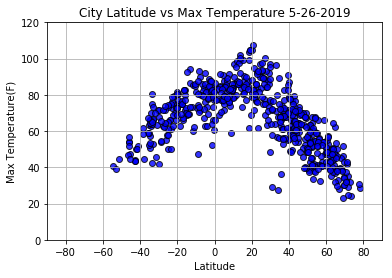

In [136]:
#Temperature (F) vs. Latitude scatter plot
temperature = final_clean_df.Temp_max.to_list()
lat1 = final_clean_df.lat.to_list()

plt.scatter(lat1,
            temperature,
            c="blue",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Urban")

plt.title("City Latitude vs Max Temperature 5-26-2019")
plt.ylabel("Max Temperature(F)")
plt.ylim((0,120))
plt.xlabel("Latitude")
plt.xlim((-90,90))
plt.grid(True)
plt.savefig("City Latitude and Maxtemp.png")

plt.show()

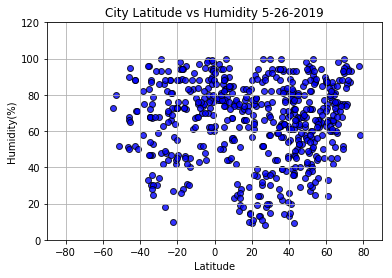

In [137]:
#Humidity (F) vs. Latitude scatter plot
Humidity1 = final_clean_df.Humidity.to_list()
lat1 = final_clean_df.lat.to_list()

plt.scatter(lat1,
            Humidity1,
            c="blue",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Urban")

plt.title("City Latitude vs Humidity 5-26-2019")
plt.ylabel("Humidity(%)")
plt.ylim((0,120))
plt.xlabel("Latitude")
plt.xlim((-90,90))
plt.grid(True)
plt.savefig("City Latitude and humidity.png")

plt.show()

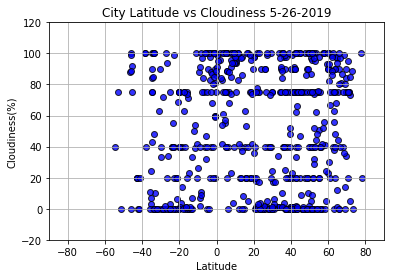

In [139]:
#Cloudiness vs. Latitude scatter plot
Cloudiness1 = final_clean_df.Cloudiness.to_list()
lat1 = final_clean_df.lat.to_list()

plt.scatter(lat1,
            Cloudiness1,
            c="blue",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Urban")

plt.title("City Latitude vs Cloudiness 5-26-2019")
plt.ylabel("Cloudiness(%)")
plt.ylim((-20,120))
plt.xlabel("Latitude")
plt.xlim((-90,90))
plt.grid(True)
plt.savefig("City Latitude and Cloudiness.png")

plt.show()

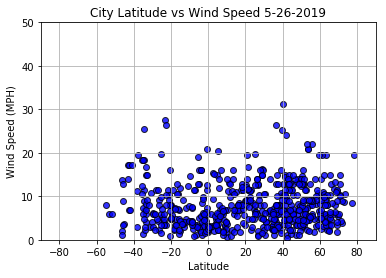

In [141]:
#WindSpeed vs. Latitude scatter plot
windspeed1 = final_clean_df.wind_speed.to_list()
lat1 = final_clean_df.lat.to_list()

plt.scatter(lat1,
            windspeed1,
            c="blue",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Urban")

plt.title("City Latitude vs Wind Speed 5-26-2019")
plt.ylabel("Wind Speed (MPH)")
plt.ylim((0,50))
plt.xlabel("Latitude")
plt.xlim((-90,90))
plt.grid(True)
plt.savefig("City Latitude and Wind Speed.png")

plt.show()